In [1]:
import pandas as pd
import numpy as np


In [2]:
ENS_2017 = pd.read_csv("../Data/Bases_originales/ENS_2017_Adultos_1.csv", sep =';')

C:\Users\ggarr\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (149,151,152) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ENS_2017.shape

(23089, 456)

### Eliminar columnas

#### Se han eliminado las columnas correspondientes a los apartados:
- Identificación del hogar
- Identificación del informante
- Relación de la persona seleccionada con la actividad económica
- Módulo europeo del estado de salud. Se mantiene únicamente del módulo: Estado de salud, la pregunta referente a 'Estado de salud percibido en los últimos 12 meses' y el módulo de prácticas preventivas
- Módulo determinantes de salud, se han mantenido las más genéricas de cada apartado. Se han eliminado las del apartado referente a: cuidado de otras personas con problemas de salud


In [4]:
TO_ENS_2017 = ['IDENTHOGAR', 'A7_2a', 'PROXY_0','PROXY_1', 'PROXY_2', 'PROXY_2b', 'PROXY_3b', 'PROXY_4', 'PROXY_5', 'E2_1c', 'E2_1d','E3','F6', 'F7','F8_2','F9_2','F10','F11','F12','F13','F14a','F14b','F15','F16','F17','F18a_2','F18b_2','F19a_2','F19b_2','F20',
'G22','G23','G24','G25a_1','G25b_1','G25c_1','G25a_2','G25b_2','G25c_2','G25a_3','G25b_3','G25c_3','G25a_4','G25b_4','G25c_4','G25a_5','G25b_5','G25c_5','G25a_6','G25b_6','G25c_6','G25a_7','G25b_7','G25c_7','G25a_8','G25b_8','G25c_8','G25a_9','G25b_9','G25c_9','G25a_10','G25b_10','G25c_10','G25a_11','G25b_11','G25c_11','G25a_12','G25b_12','G25c_12','G25a_13','G25b_13','G25c_13','G25a_14','G25b_14','G25c_14','G25a_15','G25b_15','G25c_15','G25a_16','G25b_16','G25c_16','G25a_17','G25b_17','G25c_17','G25a_18','G25b_18','G25c_18','G25a_19','G25b_19','G25c_19','G25a_20','G25b_20','G25c_20','G25a_21','G25b_21','G25c_21','G25a_22','G25b_22','G25c_22','G25a_23','G25b_23','G25c_23','G25a_24','G25b_24','G25c_24','G25a_25','G25b_25','G25c_25','G25a_26','G25b_26','G25c_26','G25a_27','G25b_27','G25c_27','G25a_28','G25b_28','G25c_28','G25a_29','G25b_29','G25c_29','G25a_30','G25b_30','G25c_30','G25a_31','G25b_31','G25c_31','G25a_32','G25b_32','G25c_32',
'H26_1','H26_2','H26_3','H27',
'I28_1','I28_2','I29_1','I29_2',
'K32','K33','K34','K35','K36','K37','K38','K38a',
'L39_1','L39_2','L39_3','L39_4','L39_5','L40','L41','L42_1','L42_2','L42_3','L42_4','L42_5','L42_6','L42_7','L43','L44','L45','L46','M47_1','M47_2','M47_3','M47_4','M47_5','M47_6','M47_7','M47_8','M47_9','M47_10','M47_11','M47_12','M47a','M47b',
'N48','N49','N50','N51','N52','N53','N54','N55_1','N55_2','N55_3','N56_1','N56_2','N56_3','N57','N58_1','N58_2','N58_3','N59','N60_1','N60_2','N60_3','N60_4','N60a_1','N60a_2','N60a_3','N60a_4','N61_1','N61_2','N61_3','N61_4','N61_5','N62','N62b','N63_1','N63_2','N63_3','N63_4','N63_5','N63_6','N63_7','N63_8','N63_9','N63_10','N64','N65_1','N65_2','N65_3','N65_4','N65_5','N65_6','N65_7','N65_8',
'O66','O67','O69','O70','O71','O72','O73','O74','O75','O76','O77','O78','O79','O80_1','O80_2','O80_3','O81_1','O81_2','O81_3','O82_1','O82_2','O83','O84_1','O84_2','O84_3','O84_4','O84_5','O84_6','O84_7','O84_8','O84_9',
'P85','P86','P87_1a','P87_1b','P87_2a','P87_2b','P87_3a','P87_3b','P87_4a','P87_4b','P87_5a','P87_5b','P87_6a','P87_6b','P87_7a','P87_7b','P87_8a','P87_8b','P87_9a','P87_9b','P87_10a','P87_10b','P87_11a','P87_11b','P87_12a','P87_12b','P87_13a','P87_13b','P87_14a','P87_14b','P87_15a','P87_15b','P87_16a','P87_16b','P87_17a','P87_17b','P87_18a','P87_18b','P87_19a','P87_19b','P87_20a','P87_20b','P87_21a','P87_21b','P87_22a','P87_22b','P87_23a','P87_23b',
'Q90', 'Q92','Q94', 'Q96', 'Q97', 'Q99', 'Q100', 'Q101','Q102','Q103','Q104','Q105',
'R106','R107','R108_1','R108_2','R108_3','R108_4','T111', 'T113', 'T114_1','T114_2', 'T115', 'T116_1', 'T116_2', 'T117', 'T117', 'T118_2','T118_1','T119_1','T119_2',
'U120_1a','U120_7a','U120_15a','U120FZ','U120CANTFZ',
'V122','V123','V124','V125','V126',
'W128Cer','W128Cer_1','W128Cer_2','W128Cer_3','W128Cer_4','W128Cer_5','W128Cer_6','W128Cer_7','W128Vin','W128Vin_1','W128Vin_2','W128Vin_3','W128Vin_4','W128Vin_5','W128Vin_6','W128Vin_7','W128Vermut','W128Vermut_1','W128Vermut_2','W128Vermut_3','W128Vermut_4','W128Vermut_5','W128Vermut_6','W128Vermut_7','W128Lic','W128Lic_1','W128Lic_2','W128Lic_3','W128Lic_4','W128Lic_5','W128Lic_6','W128Lic_7','W128Comb','W128Comb_1','W128Comb_2','W128Comb_3',
'W128Comb_4','W128Comb_5','W128Comb_6','W128Comb_7',
'W128Sidra','W128Sidra_1','W128Sidra_2','W128Sidra_3',
'W128Sidra_4','W128Sidra_5','W128Sidra_6','W128Sidra_7','W129','Y133','Y134','Y135','CMD1','CMD2','CMD3','FACTORADULTO',
'Unnamed: 455']

ENS_2017.drop(TO_ENS_2017, inplace = True, axis=1)

In [5]:
ENS_2017.dtypes

CCAA        int64
SEXOa       int64
EDADa       int64
ACTIVa      int64
E1_1        int64
E2_1a       int64
E2_1b       int64
E4          int64
E4b         int64
NIVEST      int64
G21         int64
Q88         int64
Q89         int64
Q91         int64
Q93         int64
Q95         int64
Q98         int64
S109        int64
S110        int64
T112        int64
U120_1      int64
U120_2      int64
U120_3      int64
U120_4      int64
U120_5      int64
U120_6      int64
U120_7      int64
U120_8      int64
U120_9      int64
U120_10     int64
U120_11     int64
U120_12     int64
U120_13     int64
U120_14     int64
U120_15     int64
U2_120F     int64
V121        int64
W127        int64
X130_1      int64
X130_2      int64
X130_3      int64
X130_4      int64
X130_5      int64
X130_6      int64
X130_7      int64
X130_8      int64
X130_9      int64
X130_10     int64
X130_11     int64
CLASE_PR    int64
IMCa        int64
dtype: object

In [6]:
ENS_2017.shape

(23089, 51)

In [7]:
ENS_2017.columns

Index(['CCAA', 'SEXOa', 'EDADa', 'ACTIVa', 'E1_1', 'E2_1a', 'E2_1b', 'E4',
       'E4b', 'NIVEST', 'G21', 'Q88', 'Q89', 'Q91', 'Q93', 'Q95', 'Q98',
       'S109', 'S110', 'T112', 'U120_1', 'U120_2', 'U120_3', 'U120_4',
       'U120_5', 'U120_6', 'U120_7', 'U120_8', 'U120_9', 'U120_10', 'U120_11',
       'U120_12', 'U120_13', 'U120_14', 'U120_15', 'U2_120F', 'V121', 'W127',
       'X130_1', 'X130_2', 'X130_3', 'X130_4', 'X130_5', 'X130_6', 'X130_7',
       'X130_8', 'X130_9', 'X130_10', 'X130_11', 'CLASE_PR', 'IMCa'],
      dtype='object')

## Control de calidad de los datos de la base

### Vemos en qué variables tenemos más de un 10% de missing. En caso de que haya alguna, la eliminaremos

In [8]:
# obtenemos la ruta absoluta del archivo en el que me encuentro
import sys, os
path = os.getcwd()
path


'c:\\Users\\ggarr\\OneDrive\\Escritorio\\Data_Science\\The Bridge\\Gina\\Machine_learning\\notebooks'

In [9]:

# doy un nombre a la ruta absoluta del archivo en la que me encuentro
# path = 'c:\\Users\\ggarr\\OneDrive\\Escritorio\\Data_Science\\The Bridge\\Machine_learning\\Notebooks'

# Con dirname me coloco en la carpeta superior a la que me encuentro
k = os.path.dirname(path)
k = k + os.sep + "src"
k

'c:\\Users\\ggarr\\OneDrive\\Escritorio\\Data_Science\\The Bridge\\Gina\\Machine_learning\\src'

In [10]:
sys.path.append(k)

# sys.path: vemos la carpeta en la que nos hemos situado

In [11]:
# estando en una carpeta superior a aquella de la que quiero extraer una función, puedo extraer la función sin problema
import utils.Mining_data as md

Missing_value_porcentaje_columna = md.Porcentaje_missing_columna (ENS_2017)



# NO HAY VALORES MISSING porque están recogidos en las opciones de 'No sabe' o 'No contesta'


In [12]:
# Creo una nueva base para hacer las modificaciones necesarias 
ENS_2017_1 = ENS_2017

### Variables categóricas. Pasar "No sabe, No contesta" a NaN

In [13]:
# Paso los valores correspondientes a 'No sabe' y 'No contesta' a missing

ENS_2017_1['ACTIVa']= ENS_2017_1['ACTIVa'].replace({7: np.nan, 8: np.nan})
ENS_2017_1['E1_1']= ENS_2017_1['E1_1'] .replace({8: np.nan, 9: np.nan})
ENS_2017_1['E4']= ENS_2017_1['E4'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['E4b']= ENS_2017_1['E4b'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['NIVEST']= ENS_2017_1['NIVEST'].replace({98: np.nan, 99: np.nan})
ENS_2017_1['Q89']= ENS_2017_1['Q89'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['Q91']= ENS_2017_1['Q91'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['Q93']= ENS_2017_1['Q93'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['Q95']= ENS_2017_1['Q95'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['Q98']= ENS_2017_1['Q98'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['T112']= ENS_2017_1['T112'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_1']= ENS_2017_1['U120_1'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_2']= ENS_2017_1['U120_2'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_3']= ENS_2017_1['U120_3'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_4']= ENS_2017_1['U120_4'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_5']= ENS_2017_1['U120_5'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_6']= ENS_2017_1['U120_6'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_7']= ENS_2017_1['U120_7'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_8']= ENS_2017_1['U120_8'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_9']= ENS_2017_1['U120_9'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_10']= ENS_2017_1['U120_10'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_11']= ENS_2017_1['U120_11'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_12']= ENS_2017_1['U120_12'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_13']= ENS_2017_1['U120_13'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_14']= ENS_2017_1['U120_14'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U120_15']= ENS_2017_1['U120_15'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['U2_120F']= ENS_2017_1['U2_120F'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['V121']= ENS_2017_1['V121'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['W127']= ENS_2017_1['W127'].replace({98: np.nan, 99: np.nan})
ENS_2017_1['X130_1']= ENS_2017_1['X130_1'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_2']= ENS_2017_1['X130_2'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_3']= ENS_2017_1['X130_3'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_4']= ENS_2017_1['X130_4'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_5']= ENS_2017_1['X130_5'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_6']= ENS_2017_1['X130_6'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_7']= ENS_2017_1['X130_7'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_8']= ENS_2017_1['X130_8'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_9']= ENS_2017_1['X130_9'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_10']= ENS_2017_1['X130_10'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['X130_11']= ENS_2017_1['X130_11'].replace({8: np.nan, 9: np.nan})
ENS_2017_1['CLASE_PR']= ENS_2017_1['CLASE_PR'].replace({9: np.nan})
ENS_2017_1['IMCa']= ENS_2017_1['IMCa'].replace({9: np.nan})



#### Calcular el porcentaje de NaN de variables categóricas

In [14]:
# Calculo el porcentaje de missing en cada variable una vez pasados los valores de 'No sabe' y 'No contesta' a missing

na_ratio = ((ENS_2017_1['ACTIVa'].isnull().sum() / len(ENS_2017_1['ACTIVa']))*100)
print (f'El porcentaje de missing value de la variable ACTIVa es: {na_ratio}')
na_ratio = ((ENS_2017_1['E1_1'].isnull().sum() / len(ENS_2017_1['E1_1']))*100)
print (f'El porcentaje de missing value de la variable E1_1 es: {na_ratio}')
na_ratio = ((ENS_2017_1['E4'].isnull().sum() / len(ENS_2017_1['E4']))*100)
print (f'El porcentaje de missing value de la variable E4 es: {na_ratio}')
na_ratio = ((ENS_2017_1['E4b'].isnull().sum() / len(ENS_2017_1['E4b']))*100)
print (f'El porcentaje de missing value de la variable E4b es: {na_ratio}')
na_ratio = ((ENS_2017_1['NIVEST'].isnull().sum() / len(ENS_2017_1['NIVEST']))*100)
print (f'El porcentaje de missing value de la variable NIVEST es: {na_ratio}')
na_ratio = ((ENS_2017_1['Q89'].isnull().sum() / len(ENS_2017_1['Q89']))*100)
print (f'El porcentaje de missing value de la variable Q89 es: {na_ratio}')
na_ratio = ((ENS_2017_1['Q91'].isnull().sum() / len(ENS_2017_1['Q91']))*100)
print (f'El porcentaje de missing value de la variable Q91 es: {na_ratio}')
na_ratio = ((ENS_2017_1['Q93'].isnull().sum() / len(ENS_2017_1['Q93']))*100)
print (f'El porcentaje de missing value de la variable Q93 es: {na_ratio}')
na_ratio = ((ENS_2017_1['Q95'].isnull().sum() / len(ENS_2017_1['Q95']))*100)
print (f'El porcentaje de missing value de la variable Q95 es: {na_ratio}')
na_ratio = ((ENS_2017_1['Q98'].isnull().sum() / len(ENS_2017_1['Q98']))*100)
print (f'El porcentaje de missing value de la variable Q98 es: {na_ratio}')
na_ratio = ((ENS_2017_1['T112'].isnull().sum() / len(ENS_2017_1['T112']))*100)
print (f'El porcentaje de missing value de la variable T112 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_1'].isnull().sum() / len(ENS_2017_1['U120_1']))*100)
print (f'El porcentaje de missing value de la variable U120_1 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_2'].isnull().sum() / len(ENS_2017_1['U120_2']))*100)
print (f'El porcentaje de missing value de la variable U120_2 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_3'].isnull().sum() / len(ENS_2017_1['U120_3']))*100)
print (f'El porcentaje de missing value de la variable U120_3 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_4'].isnull().sum() / len(ENS_2017_1['U120_4']))*100)
print (f'El porcentaje de missing value de la variable U120_4 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_5'].isnull().sum() / len(ENS_2017_1['U120_5']))*100)
print (f'El porcentaje de missing value de la variable U120_5 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_6'].isnull().sum() / len(ENS_2017_1['U120_6']))*100)
print (f'El porcentaje de missing value de la variable U120_6 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_7'].isnull().sum() / len(ENS_2017_1['U120_7']))*100)
print (f'El porcentaje de missing value de la variable U120_7 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_8'].isnull().sum() / len(ENS_2017_1['U120_8']))*100)
print (f'El porcentaje de missing value de la variable U120_8 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_9'].isnull().sum() / len(ENS_2017_1['U120_9']))*100)
print (f'El porcentaje de missing value de la variable U120_9 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_10'].isnull().sum() / len(ENS_2017_1['U120_10']))*100)
print (f'El porcentaje de missing value de la variable U120_10 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_11'].isnull().sum() / len(ENS_2017_1['U120_11']))*100)
print (f'El porcentaje de missing value de la variable U120_11 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_12'].isnull().sum() / len(ENS_2017_1['U120_12']))*100)
print (f'El porcentaje de missing value de la variable U120_12 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_13'].isnull().sum() / len(ENS_2017_1['U120_13']))*100)
print (f'El porcentaje de missing value de la variable U120_13 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_14'].isnull().sum() / len(ENS_2017_1['U120_14']))*100)
print (f'El porcentaje de missing value de la variable U120_14 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U120_15'].isnull().sum() / len(ENS_2017_1['U120_15']))*100)
print (f'El porcentaje de missing value de la variable U120_15 es: {na_ratio}')
na_ratio = ((ENS_2017_1['U2_120F'].isnull().sum() / len(ENS_2017_1['U2_120F']))*100)
print (f'El porcentaje de missing value de la variable U2_120F es: {na_ratio}')
na_ratio = ((ENS_2017_1['V121'].isnull().sum() / len(ENS_2017_1['V121']))*100)
print (f'El porcentaje de missing value de la variable V121 es: {na_ratio}')
na_ratio = ((ENS_2017_1['W127'].isnull().sum() / len(ENS_2017_1['W127']))*100)
print (f'El porcentaje de missing value de la variable W127 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_1'].isnull().sum() / len(ENS_2017_1['X130_1']))*100)
print (f'El porcentaje de missing value de la variable X130_1 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_2'].isnull().sum() / len(ENS_2017_1['X130_2']))*100)
print (f'El porcentaje de missing value de la variable X130_2 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_3'].isnull().sum() / len(ENS_2017_1['X130_3']))*100)
print (f'El porcentaje de missing value de la variable X130_3 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_4'].isnull().sum() / len(ENS_2017_1['X130_4']))*100)
print (f'El porcentaje de missing value de la variable X130_4 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_5'].isnull().sum() / len(ENS_2017_1['X130_5']))*100)
print (f'El porcentaje de missing value de la variable X130_5 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_6'].isnull().sum() / len(ENS_2017_1['X130_6']))*100)
print (f'El porcentaje de missing value de la variable X130_6 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_7'].isnull().sum() / len(ENS_2017_1['X130_7']))*100)
print (f'El porcentaje de missing value de la variable X130_7 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_8'].isnull().sum() / len(ENS_2017_1['X130_8']))*100)
print (f'El porcentaje de missing value de la variable X130_8 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_9'].isnull().sum() / len(ENS_2017_1['X130_9']))*100)
print (f'El porcentaje de missing value de la variable X130_9 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_10'].isnull().sum() / len(ENS_2017_1['X130_10']))*100)
print (f'El porcentaje de missing value de la variable X130_10 es: {na_ratio}')
na_ratio = ((ENS_2017_1['X130_11'].isnull().sum() / len(ENS_2017_1['X130_11']))*100)
print (f'El porcentaje de missing value de la variable X130_11 es: {na_ratio}')
na_ratio = ((ENS_2017_1['CLASE_PR'].isnull().sum() / len(ENS_2017_1['CLASE_PR']))*100)
print (f'El porcentaje de missing value de la variable CLASE_PR es: {na_ratio}')
na_ratio = ((ENS_2017_1['IMCa'].isnull().sum() / len(ENS_2017_1['IMCa']))*100)
print (f'El porcentaje de missing value de la variable IMCa es: {na_ratio}')


El porcentaje de missing value de la variable ACTIVa es: 0.12126986876867772
El porcentaje de missing value de la variable E1_1 es: 0.0
El porcentaje de missing value de la variable E4 es: 0.6020182771016501
El porcentaje de missing value de la variable E4b es: 0.16891160292780114
El porcentaje de missing value de la variable NIVEST es: 0.0
El porcentaje de missing value de la variable Q89 es: 0.11260773528520074
El porcentaje de missing value de la variable Q91 es: 0.220884403828663
El porcentaje de missing value de la variable Q93 es: 0.3464853393390792
El porcentaje de missing value de la variable Q95 es: 0.7492745463207588
El porcentaje de missing value de la variable Q98 es: 0.4157824072068951
El porcentaje de missing value de la variable T112 es: 0.0433106674173849
El porcentaje de missing value de la variable U120_1 es: 0.06063493438433886
El porcentaje de missing value de la variable U120_2 es: 0.09528346831824679
El porcentaje de missing value de la variable U120_3 es: 0.07362

#### Reemplazar por la moda, los valores NaN de variables categóricas

In [15]:
ENS_2017_1['ACTIVa'].fillna(ENS_2017_1['ACTIVa'].mode()[0], inplace=True)
print("Valores perdidos en ACTIVa: " + str(ENS_2017_1['ACTIVa'].isnull().sum()))
ENS_2017_1['E4'].fillna(ENS_2017_1['E4'].mode()[0], inplace=True)
print("Valores perdidos en E4: " + str(ENS_2017_1['E4'].isnull().sum()))
ENS_2017_1['E4b'].fillna(ENS_2017_1['E4b'].mode()[0], inplace=True)
print("Valores perdidos en E4b: " + str(ENS_2017_1['E4b'].isnull().sum()))
ENS_2017_1['Q89'].fillna(ENS_2017_1['Q89'].mode()[0], inplace=True)
print("Valores perdidos en Q89: " + str(ENS_2017_1['Q89'].isnull().sum()))
ENS_2017_1['Q91'].fillna(ENS_2017_1['Q91'].mode()[0], inplace=True)
print("Valores perdidos en Q91: " + str(ENS_2017_1['Q91'].isnull().sum()))
ENS_2017_1['Q93'].fillna(ENS_2017_1['Q93'].mode()[0], inplace=True)
print("Valores perdidos en Q93: " + str(ENS_2017_1['Q93'].isnull().sum()))
ENS_2017_1['Q95'].fillna(ENS_2017_1['Q95'].mode()[0], inplace=True)
print("Valores perdidos en Q95: " + str(ENS_2017_1['Q95'].isnull().sum()))
ENS_2017_1['Q98'].fillna(ENS_2017_1['Q98'].mode()[0], inplace=True)
print("Valores perdidos en Q98: " + str(ENS_2017_1['Q98'].isnull().sum()))
ENS_2017_1['T112'].fillna(ENS_2017_1['T112'].mode()[0], inplace=True)
print("Valores perdidos en T112: " + str(ENS_2017_1['T112'].isnull().sum()))
ENS_2017_1['U120_1'].fillna(ENS_2017_1['U120_1'].mode()[0], inplace=True)
print("Valores perdidos en U120_1: " + str(ENS_2017_1['U120_1'].isnull().sum()))
ENS_2017_1['U120_2'].fillna(ENS_2017_1['U120_2'].mode()[0], inplace=True)
print("Valores perdidos en U120_2: " + str(ENS_2017_1['U120_2'].isnull().sum()))
ENS_2017_1['U120_3'].fillna(ENS_2017_1['U120_3'].mode()[0], inplace=True)
print("Valores perdidos en U120_3: " + str(ENS_2017_1['U120_3'].isnull().sum()))
ENS_2017_1['U120_4'].fillna(ENS_2017_1['U120_4'].mode()[0], inplace=True)
print("Valores perdidos en U120_4: " + str(ENS_2017_1['U120_4'].isnull().sum()))
ENS_2017_1['U120_5'].fillna(ENS_2017_1['U120_5'].mode()[0], inplace=True)
print("Valores perdidos en U120_5: " + str(ENS_2017_1['U120_5'].isnull().sum()))
ENS_2017_1['U120_6'].fillna(ENS_2017_1['U120_6'].mode()[0], inplace=True)
print("Valores perdidos en U120_6: " + str(ENS_2017_1['U120_6'].isnull().sum()))
ENS_2017_1['U120_7'].fillna(ENS_2017_1['U120_7'].mode()[0], inplace=True)
print("Valores perdidos en U120_7: " + str(ENS_2017_1['U120_7'].isnull().sum()))
ENS_2017_1['U120_8'].fillna(ENS_2017_1['U120_8'].mode()[0], inplace=True)
print("Valores perdidos en U120_8: " + str(ENS_2017_1['U120_8'].isnull().sum()))
ENS_2017_1['U120_9'].fillna(ENS_2017_1['U120_9'].mode()[0], inplace=True)
print("Valores perdidos en U120_9: " + str(ENS_2017_1['U120_9'].isnull().sum()))
ENS_2017_1['U120_10'].fillna(ENS_2017_1['U120_10'].mode()[0], inplace=True)
print("Valores perdidos en U120_10: " + str(ENS_2017_1['U120_10'].isnull().sum()))
ENS_2017_1['U120_11'].fillna(ENS_2017_1['U120_11'].mode()[0], inplace=True)
print("Valores perdidos en U120_11: " + str(ENS_2017_1['U120_11'].isnull().sum()))
ENS_2017_1['U120_12'].fillna(ENS_2017_1['U120_12'].mode()[0], inplace=True)
print("Valores perdidos en U120_12: " + str(ENS_2017_1['U120_12'].isnull().sum()))
ENS_2017_1['U120_13'].fillna(ENS_2017_1['U120_13'].mode()[0], inplace=True)
print("Valores perdidos en U120_13: " + str(ENS_2017_1['U120_13'].isnull().sum()))
ENS_2017_1['U120_14'].fillna(ENS_2017_1['U120_14'].mode()[0], inplace=True)
print("Valores perdidos en U120_14: " + str(ENS_2017_1['U120_14'].isnull().sum()))
ENS_2017_1['U120_15'].fillna(ENS_2017_1['U120_15'].mode()[0], inplace=True)
print("Valores perdidos en U120_15: " + str(ENS_2017_1['U120_15'].isnull().sum()))
ENS_2017_1['U2_120F'].fillna(ENS_2017_1['U2_120F'].mode()[0], inplace=True)
print("Valores perdidos en U2_120F: " + str(ENS_2017_1['U2_120F'].isnull().sum()))
ENS_2017_1['V121'].fillna(ENS_2017_1['V121'].mode()[0], inplace=True)
print("Valores perdidos en V121: " + str(ENS_2017_1['V121'].isnull().sum()))
ENS_2017_1['W127'].fillna(ENS_2017_1['W127'].mode()[0], inplace=True)
print("Valores perdidos en W127: " + str(ENS_2017_1['W127'].isnull().sum()))
ENS_2017_1['X130_1'].fillna(ENS_2017_1['X130_1'].mode()[0], inplace=True)
print("Valores perdidos en X130_1: " + str(ENS_2017_1['X130_1'].isnull().sum()))
ENS_2017_1['X130_2'].fillna(ENS_2017_1['X130_2'].mode()[0], inplace=True)
print("Valores perdidos en X130_2: " + str(ENS_2017_1['X130_2'].isnull().sum()))
ENS_2017_1['X130_3'].fillna(ENS_2017_1['X130_3'].mode()[0], inplace=True)
print("Valores perdidos en X130_3: " + str(ENS_2017_1['X130_3'].isnull().sum()))
ENS_2017_1['X130_4'].fillna(ENS_2017_1['X130_4'].mode()[0], inplace=True)
print("Valores perdidos en X130_4: " + str(ENS_2017_1['X130_4'].isnull().sum()))
ENS_2017_1['X130_5'].fillna(ENS_2017_1['X130_5'].mode()[0], inplace=True)
print("Valores perdidos en X130_5: " + str(ENS_2017_1['X130_5'].isnull().sum()))
ENS_2017_1['X130_6'].fillna(ENS_2017_1['X130_6'].mode()[0], inplace=True)
print("Valores perdidos en X130_6: " + str(ENS_2017_1['X130_6'].isnull().sum()))
ENS_2017_1['X130_7'].fillna(ENS_2017_1['X130_7'].mode()[0], inplace=True)
print("Valores perdidos en X130_7: " + str(ENS_2017_1['X130_7'].isnull().sum()))
ENS_2017_1['X130_8'].fillna(ENS_2017_1['X130_8'].mode()[0], inplace=True)
print("Valores perdidos en X130_8: " + str(ENS_2017_1['X130_8'].isnull().sum()))
ENS_2017_1['X130_9'].fillna(ENS_2017_1['X130_9'].mode()[0], inplace=True)
print("Valores perdidos en X130_9: " + str(ENS_2017_1['X130_9'].isnull().sum()))
ENS_2017_1['X130_10'].fillna(ENS_2017_1['X130_10'].mode()[0], inplace=True)
print("Valores perdidos en X130_10: " + str(ENS_2017_1['X130_10'].isnull().sum()))
ENS_2017_1['X130_11'].fillna(ENS_2017_1['X130_11'].mode()[0], inplace=True)
print("Valores perdidos en X130_11: " + str(ENS_2017_1['X130_11'].isnull().sum()))
ENS_2017_1['CLASE_PR'].fillna(ENS_2017_1['CLASE_PR'].mode()[0], inplace=True)
print("Valores perdidos en CLASE_PR: " + str(ENS_2017_1['CLASE_PR'].isnull().sum()))
ENS_2017_1['IMCa'].fillna(ENS_2017_1['IMCa'].mode()[0], inplace=True)
print("Valores perdidos en IMCa: " + str(ENS_2017_1['IMCa'].isnull().sum()))



Valores perdidos en ACTIVa: 0
Valores perdidos en E4: 0
Valores perdidos en E4b: 0
Valores perdidos en Q89: 0
Valores perdidos en Q91: 0
Valores perdidos en Q93: 0
Valores perdidos en Q95: 0
Valores perdidos en Q98: 0
Valores perdidos en T112: 0
Valores perdidos en U120_1: 0
Valores perdidos en U120_2: 0
Valores perdidos en U120_3: 0
Valores perdidos en U120_4: 0
Valores perdidos en U120_5: 0
Valores perdidos en U120_6: 0
Valores perdidos en U120_7: 0
Valores perdidos en U120_8: 0
Valores perdidos en U120_9: 0
Valores perdidos en U120_10: 0
Valores perdidos en U120_11: 0
Valores perdidos en U120_12: 0
Valores perdidos en U120_13: 0
Valores perdidos en U120_14: 0
Valores perdidos en U120_15: 0
Valores perdidos en U2_120F: 0
Valores perdidos en V121: 0
Valores perdidos en W127: 0
Valores perdidos en X130_1: 0
Valores perdidos en X130_2: 0
Valores perdidos en X130_3: 0
Valores perdidos en X130_4: 0
Valores perdidos en X130_5: 0
Valores perdidos en X130_6: 0
Valores perdidos en X130_7: 0
V

### Variables numéricas. Pasar los "No sabe y No contesta" a NaN

In [16]:
# Paso los valores correspondientes a 'No sabe' y 'No contesta' a missing

ENS_2017_1['S109']= ENS_2017_1['S109'].replace({998: np.nan, 999: np.nan})
ENS_2017_1['S110']= ENS_2017_1['S110'].replace({998: np.nan, 999: np.nan})


#### Calcular el porcentaje de NaN de variables numéricas

In [17]:
# Calculo el porcentaje de missing en cada variable una vez pasados los valores de 'No sabe' y 'No contesta' a missing

na_ratio = ((ENS_2017_1['S109'].isnull().sum() / len(ENS_2017_1['S109']))*100)
print (f'El porcentaje de missing value de la variable S109 es: {na_ratio}')
na_ratio = ((ENS_2017_1['S110'].isnull().sum() / len(ENS_2017_1['S110']))*100)
print (f'El porcentaje de missing value de la variable S110 es: {na_ratio}')


El porcentaje de missing value de la variable S109 es: 2.5899779115596173
El porcentaje de missing value de la variable S110 es: 3.2093204556282213


#### Reemplazar por la mediana los valores NaN de variables numéricas

In [18]:
ENS_2017_1['S109'].fillna(ENS_2017_1['S109'].median(), inplace=True)
print("Valores perdidos en S109: " + str(ENS_2017_1['S109'].isnull().sum()))
ENS_2017_1['S110'].fillna(ENS_2017_1['S110'].median(), inplace=True)
print("Valores perdidos en S110: " + str(ENS_2017_1['S110'].isnull().sum()))


Valores perdidos en S109: 0
Valores perdidos en S110: 0


### Vemos si existen duplicados

In [19]:
Duplicados = ENS_2017_1.duplicated()

# NO HAY VALORES DUPLICADOS

 ### Vemos si existen Outliers en alguna columna

In [20]:
import matplotlib.pyplot as plt

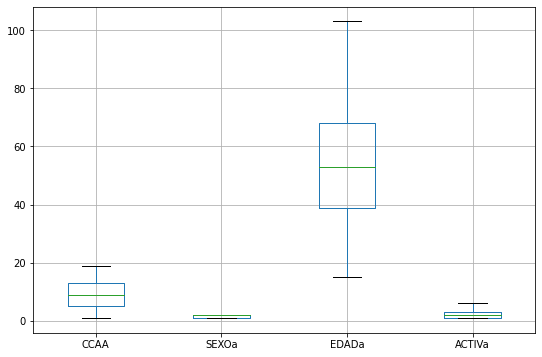

In [21]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['CCAA', 'SEXOa', 'EDADa', 'ACTIVa'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.1.jpg", bbox_inches='tight') # para archivar el gráfico como jpg
  

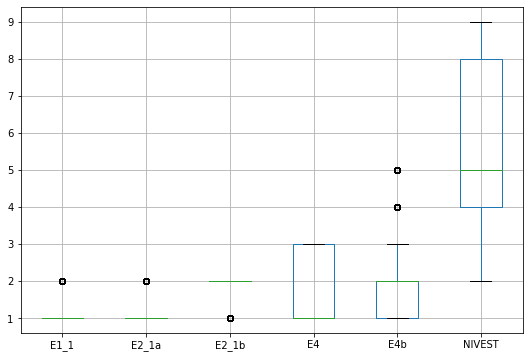

In [22]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['E1_1', 'E2_1a', 'E2_1b','E4', 'E4b', 'NIVEST'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.2.jpg", bbox_inches='tight')

# Los outliers de E1_1, E2_1a y E2_1b, E4b vienen dados por el diferente porcentaje de personas que se incluyen en algunas de las categorías  
# E1_1 (País de nacimiento): Nacidos en el extranjero (código: 2)
# E2_1a (Nacionalidad Española): No(código:2)
# E2_1b (Nacionalidad extranjera): No(código:2)
# E4b (Estado civil): un 2% de separado/legalmente y 5% de Divorciado/a

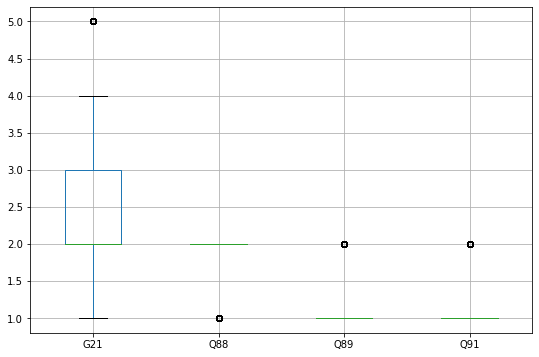

In [23]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['G21', 'Q88', 'Q89', 'Q91'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.3.jpg", bbox_inches='tight')

# Los outliers de G21 vienen dados por el diferente porcentaje de personas que se incluyen en algunas de las categorías  
# G21 (Estado de salud percibido en los últimos 12 meses): 'Muy malo' (código: 5)
# Q88 (Vacunación de la gripe en la última campaña): Sí(código:1)
# Q89 (Toma de tensión arterial alguna vez por un profesional sanitario): No(código:2)
# Q91 (Medición del nivel de colesterol en sangre): No(código:2)

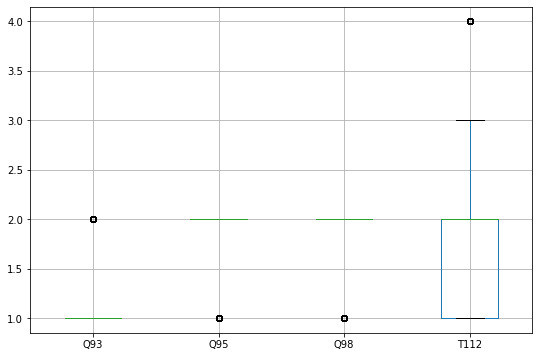

In [24]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['Q93', 'Q95', 'Q98','T112'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.4.jpg", bbox_inches='tight')

# Los outliers de 'Q93', 'Q95', 'Q98','T112' vienen dados por el diferente porcentaje de personas que se incluyen en algunas de las categorías  
# Q93 (Medición del nivel de azúcar en sangre por un profesional): 'No' (código: 2)
# Q95 (¿Alguna vez le han hecho una prueba de sangre oculta en heces?): Sí(código:1)
# Q98 (Le han realizado alguna vez una colonoscopia?): Si(código:1)
# T112 (Frecuencia con la que realiza alguna actividad física en su tiempo libre): Hago entrenamiento deportivo o físico varias veces a la semana (código:4)

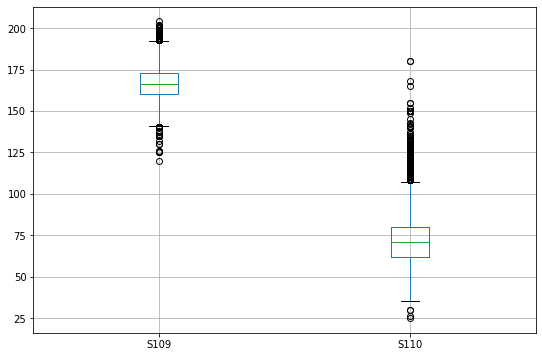

In [25]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['S109', 'S110'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.5.jpg", bbox_inches='tight')

# Los outliers de 'S109', 'S110' vienen dados por la variabilidad en peso y altura de la población encuestada  
# S109 (Altura en cm) 
# S110 (Peso en Kg) 


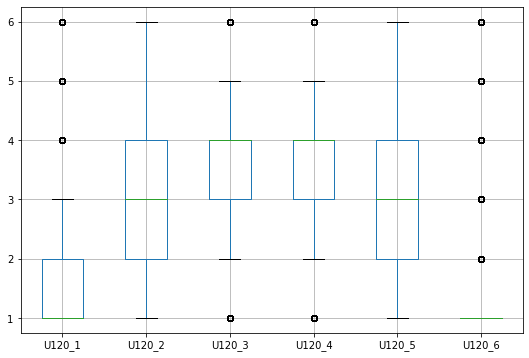

In [26]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['U120_1', 'U120_2','U120_3', 'U120_4','U120_5', 'U120_6'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.6.jpg", bbox_inches='tight')

# Los outliers de 'U120_1', 'U120_3', 'U120_4','U120_5', 'U120_6' vienen dados por el diferente porcentaje de personas que se incluyen en algunas de las categorías  
# U120_1 (Frecuencia de consumo de fruta fresca): 4: una o dos veces a la semana, 5: menos de una vez a la semana, 6: Nunca
# U120_3 (Frecuencia de consumo de huevos): 1: una o mas veces al día; 6: Nunca
# U120_4 (Frecuencia de consumo de pescado): 1: una o mas veces al día; 6: Nunca
# U120_6 (Frecuencia de consumo de pan): 2:De 4 a 6 veces a la semana, 3:Tres veces a la semana, 4:Una o dos veces a la semana, 5:Menos de una vez a la semana, 6:Nunca

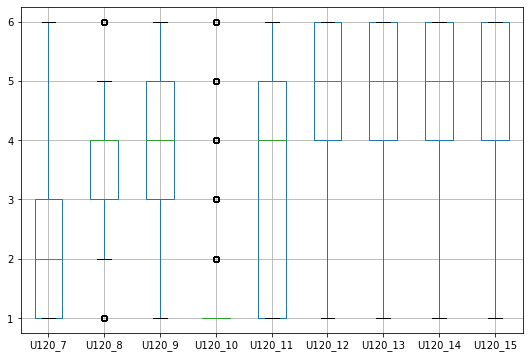

In [27]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['U120_7', 'U120_8', 'U120_9', 'U120_10', 'U120_11', 'U120_12','U120_13', 'U120_14', 'U120_15'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.7.jpg", bbox_inches='tight')

# Los outliers de 'U120_8', 'U120_10' vienen dados por el diferente porcentaje de personas que se incluyen en algunas de las categorías  
# U120_8 (Frecuencia de consumo de legumbres): 1: una o dos veces al día, 6: Nunca
# U120_10 (Frecuencia de consumo de productos lácteos): 2:De 4 a 6 veces a la semana, 3:Tres veces a la semana, 4:Una o dos veces a la semana, 5:Menos de una vez a la semana, 6:Nunca

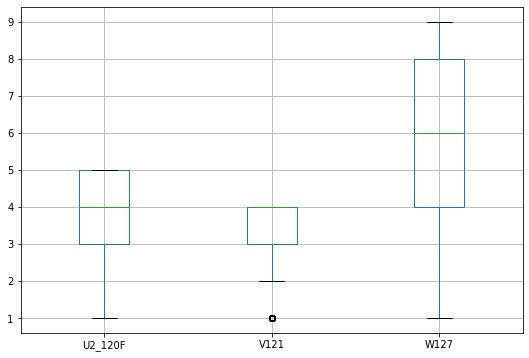

In [28]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['U2_120F', 'V121', 'W127'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.8.jpg", bbox_inches='tight')

# Los outliers de 'V121' vienen dados por el diferente porcentaje de personas que se incluyen en algunas de las categorías  
# V121 (Fuma actualmente?): 1: Sí, fumo a diario

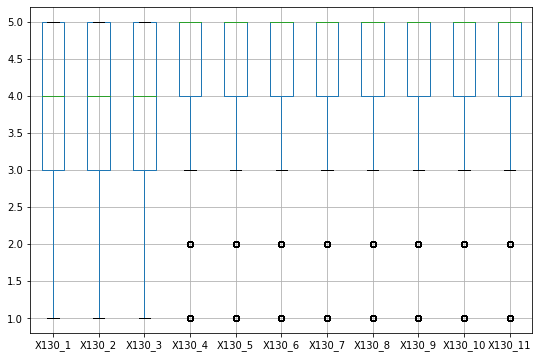

In [29]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['X130_1', 'X130_2', 'X130_3', 'X130_4', 'X130_5', 'X130_6', 'X130_7','X130_8', 'X130_9', 'X130_10', 'X130_11'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.9.jpg", bbox_inches='tight')

# Los outliers de 'X130_4', 'X130_5', 'X130_6', 'X130_7','X130_8', 'X130_9', 'X130_10', 'X130_11' vienen dados por el diferente porcentaje de personas que se incluyen en algunas de las categorías  
# X130_4 (Situaciones de apoyo afectivo y personal en la vida diaria: contar con personas que se preocu): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo
# X130_5 (Situaciones de apoyo afectivo y personal en la vida diaria: Recibir amor y afecto): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo
# X130_6 (Situaciones de apoyo afectivo y personal en la vida diariaTener la posibilidad de hablar con alguien de sus problemas en el trabajo o en la casa): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo
# X130_7 (Situaciones de apoyo afectivo y personal en la vida diaria:Tener la posibilidad de hablar con alguien de sus problemas personales y familiares): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo
# X130_8 (Situaciones de apoyo afectivo y personal en la vida diaria:Tener la posibilidad de hablar con alguien de sus problemas económicos): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo
# X130_9 (Situaciones de apoyo afectivo y personal en la vida diaria:Recibir invitaciones para distraerse y salir con otras personas): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo
# X130_10 (Situaciones de apoyo afectivo y personal en la vida diaria:Recibir consejos útiles cuando le ocurre algún acontecimiento importante en su vida): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo
# X130_11 (Situaciones de apoyo afectivo y personal en la vida diaria:Recibir ayuda cuando está enfermo en la cama): 1: Mucho menos de lo que deseo, 2: Menos de lo que deseo


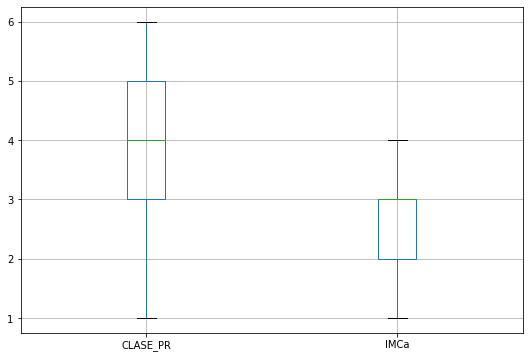

In [30]:
plt.figure(figsize=(9,6))

boxplot = ENS_2017_1.boxplot(column=['CLASE_PR','IMCa'])
boxplot.plot()

plt.savefig("../reports/outliers/ENS_2017_1.10.jpg", bbox_inches='tight')

### Renombramos las variables que entran en el estudio

In [31]:
ENS_2017_1 = ENS_2017_1.rename(columns = 
{'SEXOa': 'Sexo', 
'EDADa': 'Edad', 
'ACTIVa': 'Actividad_economica_actual', 
'E1_1': 'País_nacimiento',
'E2_1a': 'Nacionalidad_española', 
'E2_1b':'Nacionalidad_extranjera',
'E4': 'Convivencia', 
'E4b': 'Estado_civil', 
'NIVEST': 'Nivel_estudios',
'G21': 'Salud_percibida', 
'Q88':'Vacunación_gripe',
'Q89':'Toma_tensiónArterial_profesional',
'Q91': 'Medición_colesterol', 
'Q93': 'Medición_azúcarSangre', 
'Q95': 'Prueba_sangreHeces', 
'Q98': 'Colonoscopia',
'S109': 'Altura(cm)', 
'S110':'Peso(Kg)',
'T112': 'Freq_ActividadFísica', 
'U120_1': 'Freq_Consumo_FrutaFresca', 
'U120_2': 'Freq_Consumo_Carne',
'U120_3': 'Freq_Consumo_Huevos', 
'U120_4':'Freq_Consumo_Pescado',
'U120_5': 'Freq_Consumo_PastaArrozPatatas', 
'U120_6': 'Freq_Consumo_PanCereales',
'U120_7': 'Freq_Consumo_VerdurasEnsaladasHortalizas', 
'U120_8':'Freq_Consumo_Legumbres',
'U120_9': 'Freq_Consumo_EmbutidosFiambres', 
'U120_10': 'Freq_Consumo_Lácteos',
'U120_11': 'Freq_Consumo_Dulces', 
'U120_12':'Freq_Consumo_RefrescosAzúcar',
'U120_13': 'Freq_Consumo_ComidaRápida', 
'U120_14': 'Freq_Consumo_Aperitivos',
'U120_15': 'Freq_Consumo_ZumoNatural', 
'U2_120F':'Freq_Diaria_CepilladoDientes',
'V121': '¿Fuma actualmente',
'W127': 'Freq_Consumo_Alcohol', 
'X130_1':'ApoyoAfectivoPersonal_AmigosFamiliares',
'X130_2': 'ApoyoAfectivoPersonal_AsuntosCasa', 
'X130_3': 'ApoyoAfectivoPersonal_ReconocimientoTrabajo',
'X130_4': 'ApoyoAfectivoPersonal_PersonasSePreocupan', 
'X130_5':'ApoyoAfectivoPersonal_RecibirAmorAfecto',
'X130_6':'ApoyoAfectivoPersonal_HablarProblemasTrabajoCasa',
'X130_7': 'ApoyoAfectivoPersonal_HablarProblemasPersonalesFamiliares', 
'X130_8': 'ApoyoAfectivoPersonal_HablarProblemasEconómicos',
'X130_9': 'ApoyoAfectivoPersonal_RecibirInvitacionesSalirConOtrasPersonas', 
'X130_10':'ApoyoAfectivoPersonal_RecibirConsejosÚtiles',
'X130_11':'ApoyoAfectivoPersonal_RecibirAyudaEnfermoCama',
'CLASE_PR':'ClaseSocial_BasadaOcupación',
'IMCa':'Índice_MasaCorporal'})



In [32]:
ENS_2017_valida = ENS_2017_1

ENS_2017_valida.to_csv('../data/Bases_trabajo/ENS_2017_valida.csv')

In [33]:
ENS_2017_valida.columns

Index(['CCAA', 'Sexo', 'Edad', 'Actividad_economica_actual', 'País_nacimiento',
       'Nacionalidad_española', 'Nacionalidad_extranjera', 'Convivencia',
       'Estado_civil', 'Nivel_estudios', 'Salud_percibida', 'Vacunación_gripe',
       'Toma_tensiónArterial_profesional', 'Medición_colesterol',
       'Medición_azúcarSangre', 'Prueba_sangreHeces', 'Colonoscopia',
       'Altura(cm)', 'Peso(Kg)', 'Freq_ActividadFísica',
       'Freq_Consumo_FrutaFresca', 'Freq_Consumo_Carne', 'Freq_Consumo_Huevos',
       'Freq_Consumo_Pescado', 'Freq_Consumo_PastaArrozPatatas',
       'Freq_Consumo_PanCereales', 'Freq_Consumo_VerdurasEnsaladasHortalizas',
       'Freq_Consumo_Legumbres', 'Freq_Consumo_EmbutidosFiambres',
       'Freq_Consumo_Lácteos', 'Freq_Consumo_Dulces',
       'Freq_Consumo_RefrescosAzúcar', 'Freq_Consumo_ComidaRápida',
       'Freq_Consumo_Aperitivos', 'Freq_Consumo_ZumoNatural',
       'Freq_Diaria_CepilladoDientes', '¿Fuma actualmente',
       'Freq_Consumo_Alcohol', 'ApoyoA